In [ ]:
! gdown --id 1Ym8EaWePP17RvrweKhWzCJmITXLgqvCZ

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Ym8EaWePP17RvrweKhWzCJmITXLgqvCZ
To: /content/churn-modeling.zip
100% 268k/268k [00:00<00:00, 36.3MB/s]


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/churn-modeling.zip')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Анализ данных

In [ ]:
len(df)

10000

In [ ]:
df.isna().mean()

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [ ]:
df['Exited'].value_counts(normalize=True)

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64

# Обучающая, валидационная и тестовая выборки

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, test = train_test_split(df, train_size=0.6, random_state=42, stratify=df['Exited'])

In [ ]:
val, test = train_test_split(test, test_size=0.5, random_state=42, stratify=test['Exited'])

In [ ]:
train['Exited'].mean()

0.20366666666666666

In [ ]:
val['Exited'].mean()

0.204

In [ ]:
test['Exited'].mean()

0.2035

# Phik

In [ ]:
train_full = pd.concat([train, val])

In [ ]:
len(train_full)

8000

In [ ]:
!pip install phik

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 3.2 MB/s eta 0:00:00


In [ ]:
import phik

In [ ]:
phik_overview = train_full.phik_matrix()

interval columns not set, guessing: ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


/usr/local/lib/python3.10/dist-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable Surname is large: 2591. Are you sure this is not an interval variable? Analysis for pairs of variables including Surname can be slow.
  warnings.warn(


In [ ]:
phik_overview['Exited'].sort_values(ascending=False)

Exited             1.000000
NumOfProducts      0.564969
Age                0.498241
IsActiveMember     0.237244
Balance            0.167823
Gender             0.165231
CreditScore        0.123343
Geography          0.104047
CustomerId         0.035798
Tenure             0.033611
RowNumber          0.000000
Surname            0.000000
HasCrCard          0.000000
EstimatedSalary    0.000000
Name: Exited, dtype: float64

# Человеческое обучение

In [ ]:
train_full.groupby('NumOfProducts')['Exited'].agg(['count', 'mean'])

,count,mean
NumOfProducts,,
1,4060,0.275369
2,3673,0.077049
3,219,0.826484
4,48,1.000000


In [ ]:
model = train_full.groupby('NumOfProducts')['Exited'].mean().reset_index()

In [ ]:
model

,NumOfProducts,Exited
0,1,0.275369
1,2,0.077049
2,3,0.826484
3,4,1.000000


In [ ]:
model = model.rename({'Exited':'score_pred'}, axis=1)

In [ ]:
model

,NumOfProducts,score_pred
0,1,0.275369
1,2,0.077049
2,3,0.826484
3,4,1.000000


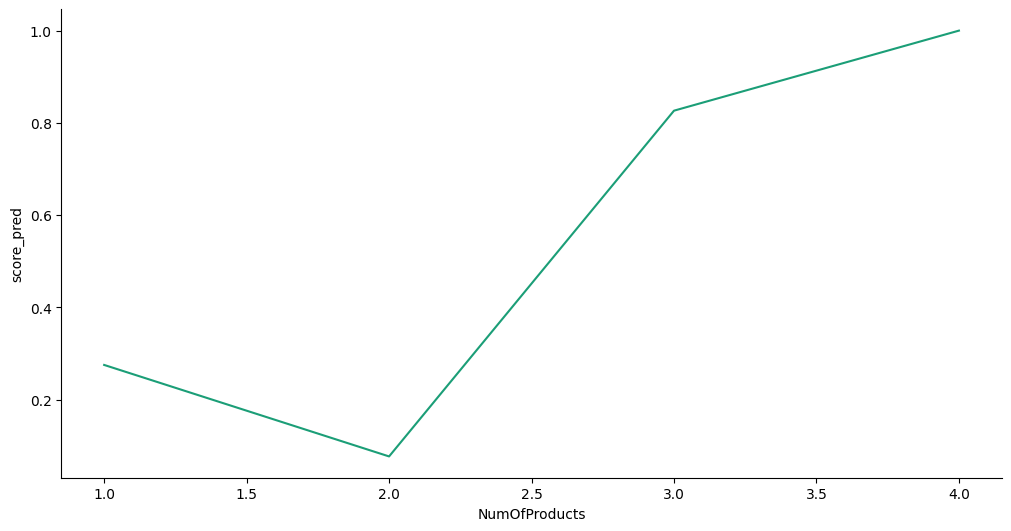

In [ ]:
# @title NumOfProducts vs score_pred

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['NumOfProducts']
  ys = series['score_pred']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = model.sort_values('NumOfProducts', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('NumOfProducts')
_ = plt.ylabel('score_pred')

In [ ]:
train_full = train_full.merge(model, how='left', on='NumOfProducts')

Baseline

In [ ]:
train_full['score_mean'] = train_full['Exited'].mean()

In [ ]:
train_full

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_pred,score_mean
0,6852,15779103,Cantamessa,527,Germany,Female,39,9,96748.89,2,1,0,94711.43,0,0.077049,0.20375
1,7027,15588123,Horton,677,France,Female,27,2,0.00,2,0,1,114685.92,0,0.077049,0.20375
2,5706,15698703,Doherty,628,Germany,Male,40,5,181768.32,2,1,1,129107.97,0,0.077049,0.20375
3,9059,15802560,Moran,470,Spain,Female,48,6,140576.11,1,1,1,116971.05,0,0.275369,0.20375
4,9416,15750407,Hunt,768,Germany,Female,43,2,129264.05,2,0,0,19150.14,0,0.077049,0.20375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,927,15628303,Thurgood,738,Spain,Male,35,3,0.00,1,1,1,15650.73,0,0.275369,0.20375
7996,6728,15610416,Christie,745,France,Female,36,9,0.00,1,1,0,19605.18,1,0.275369,0.20375
7997,4746,15655410,Hinton,768,Germany,Male,49,1,133384.66,1,1,0,102397.22,1,0.275369,0.20375
7998,1308,15638806,Blackburn,645,Spain,Male,49,2,0.00,2,0,0,10023.15,0,0.077049,0.20375


In [ ]:
from sklearn.metrics import log_loss

In [ ]:
log_loss(train_full['Exited'], train_full['score_mean'])

0.5055572860042145

In [ ]:
log_loss(train_full['Exited'], train_full['score_pred'])

0.4359616823203511

# Uplift

In [ ]:
train_full

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_pred,score_mean
0,6852,15779103,Cantamessa,527,Germany,Female,39,9,96748.89,2,1,0,94711.43,0,0.077049,0.20375
1,7027,15588123,Horton,677,France,Female,27,2,0.00,2,0,1,114685.92,0,0.077049,0.20375
2,5706,15698703,Doherty,628,Germany,Male,40,5,181768.32,2,1,1,129107.97,0,0.077049,0.20375
3,9059,15802560,Moran,470,Spain,Female,48,6,140576.11,1,1,1,116971.05,0,0.275369,0.20375
4,9416,15750407,Hunt,768,Germany,Female,43,2,129264.05,2,0,0,19150.14,0,0.077049,0.20375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,927,15628303,Thurgood,738,Spain,Male,35,3,0.00,1,1,1,15650.73,0,0.275369,0.20375
7996,6728,15610416,Christie,745,France,Female,36,9,0.00,1,1,0,19605.18,1,0.275369,0.20375
7997,4746,15655410,Hinton,768,Germany,Male,49,1,133384.66,1,1,0,102397.22,1,0.275369,0.20375
7998,1308,15638806,Blackburn,645,Spain,Male,49,2,0.00,2,0,0,10023.15,0,0.077049,0.20375


In [ ]:
train_full['Exited'].sample(frac=0.2, random_state=42)

2215    0
2582    1
1662    1
3027    0
4343    0
       ..
1079    0
7979    0
1115    0
6093    0
6832    0
Name: Exited, Length: 1600, dtype: int64

In [ ]:
exited_all = train_full['Exited'].sum()

In [ ]:
train_full['Exited'].sample(frac=0.2, random_state=42).sum()

337

In [ ]:
train_full['Exited'].sample(frac=0.3, random_state=42).sum() / exited_all

0.29938650306748466

In [ ]:
train_full = train_full.sort_values('score_pred', ascending=False)

In [ ]:
round(len(train_full) * 0.2)

1600

In [ ]:
train_full.head(round(len(train_full) * 0.2))['Exited'].sum() / exited_all

0.3576687116564417

In [ ]:
0.3576687116564417 / 0.29938650306748466 # это uplift во столько раз лучше чем baseline

1.194672131147541

# Добавим шум

In [ ]:
import numpy as np

In [ ]:
np.random.seed(42)
np.random.uniform(0, 0.001, size=len(train_full))

array([0.00037454, 0.00095071, 0.00073199, ..., 0.00045533, 0.00090844,
       0.00010448])

In [ ]:
np.random.seed(42)
train_full['score_pred'] = train_full['score_pred'] - np.random.uniform(0, 0.001, size=len(train_full))

In [ ]:
train_full['score_pred'].nunique()

8000

# Функция для uplift

In [ ]:
def uplift(df, score, pct):
  exited_all = df['Exited'].sum()
  df = df.sort_values(score, ascending=False)
  exited_found = df.head(round(len(df) * pct))['Exited'].sum()

  return (exited_found / exited_all) / pct

In [ ]:
uplift(train_full, 'score_pred', 0.2)

1.9079754601226995

In [ ]:
test = test.merge(model, how='left', on='NumOfProducts')

In [ ]:
np.random.seed(42)
test['score_pred'] = test['score_pred'] - np.random.uniform(0, 0.001, size=len(test))

In [ ]:
log_loss(test['Exited'], test['score_pred'])

0.4338658337619006

In [ ]:
uplift(test, 'score_pred', 0.2)

1.8427518427518426

# Добавим восзраст

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

<Axes: >

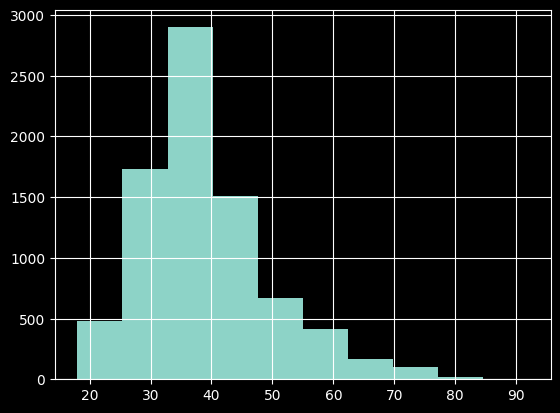

In [ ]:
train_full['Age'].hist()

In [ ]:
pd.qcut(train_full['Age'], 5)

6946    (46.0, 92.0]
1245    (35.0, 40.0]
7056    (46.0, 92.0]
7847    (46.0, 92.0]
693     (40.0, 46.0]
            ...     
1742    (31.0, 35.0]
4912    (46.0, 92.0]
4913    (35.0, 40.0]
4914    (40.0, 46.0]
0       (35.0, 40.0]
Name: Age, Length: 8000, dtype: category
Categories (5, interval[float64, right]): [(17.999, 31.0] < (31.0, 35.0] < (35.0, 40.0] <
                                           (40.0, 46.0] < (46.0, 92.0]]

In [ ]:
train_full['age_group'] = pd.cut(train_full['Age'], [0,31,35,40,46,float('inf')])

In [ ]:
train_full.groupby('age_group')['Exited'].agg(['count','mean'])

,count,mean
age_group,,
"(0.0, 31.0]",1896,0.075422
"(31.0, 35.0]",1424,0.091994
"(35.0, 40.0]",1797,0.146912
"(40.0, 46.0]",1376,0.289971
"(46.0, inf]",1507,0.459854


In [ ]:
model = train_full.groupby(['NumOfProducts','age_group'])['Exited'].mean().reset_index()

In [ ]:
model = model.rename({'Exited':'score_prod_age'}, axis=1)

In [ ]:
model

,NumOfProducts,age_group,score_prod_age
0,1,"(0.0, 31.0]",0.106774
1,1,"(31.0, 35.0]",0.135908
2,1,"(35.0, 40.0]",0.198646
3,1,"(40.0, 46.0]",0.378873
4,1,"(46.0, inf]",0.542506
5,2,"(0.0, 31.0]",0.029293
6,2,"(31.0, 35.0]",0.031206
7,2,"(35.0, 40.0]",0.059977
8,2,"(40.0, 46.0]",0.106239
9,2,"(46.0, inf]",0.225869


In [ ]:
train_full = train_full.merge(model, how='left', on=['NumOfProducts', 'age_group'])

In [ ]:
train_full

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_pred,score_mean,age_group,score_prod_age
0,6876,15665283,Brookes,610,France,Female,57,7,72092.95,4,0,1,113228.82,1,0.999625,0.20375,"(46.0, inf]",1.000000
1,3153,15724161,Sutton,644,France,Female,40,9,137285.26,4,1,0,77063.63,1,0.999049,0.20375,"(35.0, 40.0]",1.000000
2,2542,15679770,Smith,611,France,Female,61,3,131583.59,4,0,1,66238.23,1,0.999268,0.20375,"(46.0, inf]",1.000000
3,1702,15605279,Francis,792,France,Male,50,9,0.00,4,1,1,194700.81,1,0.999401,0.20375,"(46.0, inf]",1.000000
4,7568,15750545,Chidiebere,629,France,Male,44,5,0.00,4,0,0,117572.59,1,0.999844,0.20375,"(40.0, 46.0]",1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,7543,15768777,Wang,507,Spain,Female,34,4,0.00,2,1,1,60688.38,0,0.076776,0.20375,"(31.0, 35.0]",0.031206
7996,4011,15685654,Allan,514,Spain,Male,66,9,0.00,2,1,1,14234.31,0,0.076839,0.20375,"(46.0, inf]",0.225869
7997,4872,15575858,Bergamaschi,763,France,Male,40,3,0.00,2,1,0,134281.11,0,0.076593,0.20375,"(35.0, 40.0]",0.059977
7998,1650,15569423,Cunningham,731,Spain,Male,41,4,0.00,2,1,0,22299.27,0,0.076140,0.20375,"(40.0, 46.0]",0.106239


In [ ]:
log_loss(train_full['Exited'], train_full['score_prod_age'])

0.3866695862492173

In [ ]:
uplift(train_full, 'score_prod_age', 0.2)

2.7116564417177913

In [ ]:
test['age_group'] = pd.cut(test['Age'], [0,31,35,40,46,float('inf')])

In [ ]:
test = test.merge(model, how='left', on=['NumOfProducts', 'age_group'])

In [ ]:
log_loss(test['Exited'], test['score_prod_age'])

0.3870707514157596

In [ ]:
uplift(test, 'score_prod_age', 0.2)

2.7518427518427515

# Добавим IsActiveMember

In [ ]:
train_full.groupby('IsActiveMember')['Exited'].agg(['count','mean'])

,count,mean
IsActiveMember,,
0,3869,0.267511
1,4131,0.144033


In [ ]:
model = train_full.groupby(['NumOfProducts','age_group','IsActiveMember'])['Exited'].mean().reset_index()

In [ ]:
model = model.rename({'Exited':'score_prod_age_active'}, axis=1)

In [ ]:
model

,NumOfProducts,age_group,IsActiveMember,score_prod_age_active
0,1,"(0.0, 31.0]",0,0.143885
1,1,"(0.0, 31.0]",1,0.072687
2,1,"(31.0, 35.0]",0,0.177650
3,1,"(31.0, 35.0]",1,0.094286
4,1,"(35.0, 40.0]",0,0.223714
5,1,"(35.0, 40.0]",1,0.173121
6,1,"(40.0, 46.0]",0,0.466146
7,1,"(40.0, 46.0]",1,0.276074
8,1,"(46.0, inf]",0,0.793103
9,1,"(46.0, inf]",1,0.334016


In [ ]:
train_full = train_full.merge(model, how='left', on=['NumOfProducts','age_group','IsActiveMember'])

In [ ]:
log_loss(train_full['Exited'], train_full['score_prod_age_active'])

0.36550197514510024

In [ ]:
uplift(train_full, 'score_prod_age_active', 0.2)

2.8496932515337425

In [ ]:
test = test.merge(model, how='left', on=['NumOfProducts','age_group','IsActiveMember'])

In [ ]:
log_loss(test['Exited'], test['score_prod_age_active'])

0.3638472889481342

In [ ]:
uplift(test, 'score_prod_age_active', 0.2)

2.862407862407862

In [ ]:
def print_metrics(df, score):
  print(log_loss(df['Exited'], df[score]))
  print(uplift(df, score, 0.2))

In [ ]:
print_metrics(test, 'score_prod_age_active')

0.3638472889481342
2.862407862407862


# Машинное обучение

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 5.1 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
train_full.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'score_pred',
       'score_mean', 'age_group', 'score_prod_age', 'score_prod_age_active'],
      dtype='object')

In [ ]:
X = ['NumOfProducts','Age','IsActiveMember']
y = ['Exited']

In [ ]:
params = {'verbose':100,
          'random_seed':42,
          'learning_rate':0.01}

In [ ]:
model = CatBoostClassifier(**params)

In [ ]:
model.fit(train[X], train[y], eval_set=(val[X], val[y]))

0:	learn: 0.6849803	test: 0.6849389	best: 0.6849389 (0)	total: 49.4ms	remaining: 49.3s
100:	learn: 0.3991169	test: 0.3930537	best: 0.3930537 (100)	total: 290ms	remaining: 2.58s
200:	learn: 0.3659581	test: 0.3563817	best: 0.3563817 (200)	total: 535ms	remaining: 2.13s
300:	learn: 0.3589224	test: 0.3476566	best: 0.3476566 (300)	total: 997ms	remaining: 2.31s
400:	learn: 0.3565171	test: 0.3446648	best: 0.3446648 (400)	total: 1.23s	remaining: 1.84s
500:	learn: 0.3553274	test: 0.3433005	best: 0.3432984 (498)	total: 1.65s	remaining: 1.64s
600:	learn: 0.3544987	test: 0.3425379	best: 0.3425379 (600)	total: 1.87s	remaining: 1.24s
700:	learn: 0.3539638	test: 0.3421168	best: 0.3421135 (699)	total: 2.35s	remaining: 1s
800:	learn: 0.3532817	test: 0.3419139	best: 0.3419139 (800)	total: 3.05s	remaining: 757ms
900:	learn: 0.3524351	test: 0.3416923	best: 0.3416923 (900)	total: 3.9s	remaining: 429ms
999:	learn: 0.3513546	test: 0.3417688	best: 0.3416551 (927)	total: 4.72s	remaining: 0us

bestTest = 0.34165

In [ ]:
model.predict(test[X]) # Порог по умолчанию 0.5

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
model.predict_proba(test[X])

array([[0.87273278, 0.12726722],
       [0.83992875, 0.16007125],
       [0.76421314, 0.23578686],
       ...,
       [0.85243229, 0.14756771],
       [0.96002386, 0.03997614],
       [0.95396298, 0.04603702]])

In [ ]:
test['score_cat_prod_age_active'] = model.predict_proba(test[X])[:,1]

In [ ]:
test

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_pred,age_group,score_prod_age,score_prod_age_active,score_cat_prod_age_active
0,9168,15645353,Chubb,607,France,Male,26,1,0.00,1,1,0,29818.20,0,0.274995,"(0.0, 31.0]",0.106774,0.143885,0.127267
1,9388,15594576,Zhdanov,524,France,Male,32,1,144875.71,1,0,0,187740.04,0,0.274419,"(31.0, 35.0]",0.135908,0.177650,0.160071
2,6860,15811927,Marcelo,733,France,Female,38,3,157658.36,1,0,0,19658.43,0,0.274637,"(35.0, 40.0]",0.198646,0.223714,0.235787
3,3501,15675675,Slate,850,France,Female,32,5,106290.64,1,1,0,121982.73,0,0.274771,"(31.0, 35.0]",0.135908,0.177650,0.160071
4,6234,15682914,Bolton,850,France,Male,34,2,72079.71,1,1,1,115767.93,0,0.275213,"(31.0, 35.0]",0.135908,0.094286,0.102859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7393,15795079,Nnaife,596,Spain,Male,67,6,0.00,2,1,1,138350.74,0,0.076392,"(46.0, inf]",0.225869,0.134048,0.052185
1996,3234,15601550,Genovesi,595,Spain,Male,36,6,85768.42,1,1,1,24802.77,0,0.274413,"(35.0, 40.0]",0.198646,0.173121,0.127713
1997,219,15659366,Shih,807,France,Male,43,1,105799.32,2,1,0,34888.04,1,0.076980,"(40.0, 46.0]",0.106239,0.144262,0.147568
1998,4756,15740072,Padovesi,720,France,Female,37,2,120328.88,2,1,1,138470.21,0,0.076992,"(35.0, 40.0]",0.059977,0.042353,0.039976


In [ ]:
test['score_cat_prod_age_active'].nunique()

254

In [ ]:
print_metrics(test, 'score_cat_prod_age_active')

0.35878132799643003
2.899262899262899


# Обучимся на всех фичах

In [ ]:
train.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
train.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6851,6852,15779103,Cantamessa,527,Germany,Female,39,9,96748.89,2,1,0,94711.43,0
7026,7027,15588123,Horton,677,France,Female,27,2,0.00,2,0,1,114685.92,0
5705,5706,15698703,Doherty,628,Germany,Male,40,5,181768.32,2,1,1,129107.97,0
9058,9059,15802560,Moran,470,Spain,Female,48,6,140576.11,1,1,1,116971.05,0
9415,9416,15750407,Hunt,768,Germany,Female,43,2,129264.05,2,0,0,19150.14,0


In [ ]:
train.select_dtypes(include='object')

,Surname,Geography,Gender
6851,Cantamessa,Germany,Female
7026,Horton,France,Female
5705,Doherty,Germany,Male
9058,Moran,Spain,Female
9415,Hunt,Germany,Female
...,...,...,...
1467,Barbour,Germany,Female
4644,Ponomarev,Spain,Male
8942,Azuka,France,Female
2935,Olejuru,Spain,Male


In [ ]:
X = ['CustomerId', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']

cat_features = ['Geography', 'Gender']

y = ['Exited']

In [ ]:
from catboost import Pool

train_data = Pool(data=train[X],
                  label=train[y],
                  cat_features=cat_features)

valid_data = Pool(data=val[X],
                  label=val[y],
                  cat_features=cat_features)

In [ ]:
params = {'verbose':100,
          'random_seed':42,
          'learning_rate':0.01}

In [ ]:
model = CatBoostClassifier(**params)

In [ ]:
model.fit(train_data, eval_set=valid_data)

0:	learn: 0.6848575	test: 0.6849145	best: 0.6849145 (0)	total: 21.6ms	remaining: 21.6s
100:	learn: 0.3908412	test: 0.3894043	best: 0.3894043 (100)	total: 1.97s	remaining: 17.6s
200:	learn: 0.3457312	test: 0.3445503	best: 0.3445503 (200)	total: 3.65s	remaining: 14.5s
300:	learn: 0.3288071	test: 0.3307084	best: 0.3307084 (300)	total: 5.61s	remaining: 13s
400:	learn: 0.3192987	test: 0.3252459	best: 0.3252459 (400)	total: 7.52s	remaining: 11.2s
500:	learn: 0.3120470	test: 0.3221057	best: 0.3221057 (500)	total: 9.2s	remaining: 9.16s
600:	learn: 0.3054735	test: 0.3204300	best: 0.3204300 (600)	total: 11.5s	remaining: 7.64s


In [ ]:
test['score_cat_prod_age_active_all_features'] = model.predict_proba(test[X])[:,1]

In [ ]:
test

In [ ]:
test['score_cat_prod_age_active_all_features'].nunique()

In [ ]:
print_metrics(test, 'score_cat_prod_age_active_all_features')

# Feature importance

In [ ]:
model.get_feature_importance(prettified=True)

In [ ]:
phik_overview['Exited'].sort_values(ascending=False)

# Shap

In [ ]:
! pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 3.6 MB/s eta 0:00:00


In [ ]:
import shap
shap.initjs()

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(test[X])

In [ ]:
shap.summary_plot(shap_values, test[X])

In [ ]:
shap.dependence_plot('NumOfProducts', shap_values, test[X])

# Скор и пороги

In [ ]:
test

In [ ]:
test['score_cat_prod_age_active_all_features'].hist()

In [ ]:
test['y_pred'] = (test['score_cat_prod_age_active_all_features'] > 0.5) * 1

In [ ]:
test

In [ ]:
test['y_pred'].value_counts()

#Матрица ошибок

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(test['Exited'], test['y_pred'])

In [ ]:
tn, fp, fn, tp = confusion_matrix(test['Exited'], test['y_pred']).ravel()

#Recall

In [ ]:
recall = tp / (tp + fn)

In [ ]:
recall

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
recall_score(test['Exited'], test['y_pred'])

#Precision

In [ ]:
precision = tp / (fp + tp)

In [ ]:
precision

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
precision_score(test['Exited'], test['y_pred'])

#F1

In [ ]:
f1 = (2 * recall * precision)/ (recall + precision)

In [ ]:
f1

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(test['Exited'], test['y_pred'])

# Accuracy

In [ ]:
(test['Exited'] == test['y_pred']).mean()

In [ ]:
(tp + tn) / (tp + tn + fp + fn)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(test['Exited'], test['y_pred'])

# Classification report

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(test['Exited'], test['y_pred']))

# Предикт с другим порогом

In [ ]:
test['y_pred_new'] = (test['score_cat_prod_age_active_all_features'] > 0.4) * 1

In [ ]:
f1_score(test['Exited'], test['y_pred'])

# F1 score с разными порогами

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
test.head()

In [ ]:
thrs = [0] + list(test['score_cat_prod_age_active_all_features'].unique())

In [ ]:
result = []
for thr in tqdm(thrs):
  test['y_pred_new'] = (test['score_cat_prod_age_active_all_features'] > thr) * 1
  result.append((thr, f1_score(test['Exited'], test['y_pred_new'])))


In [ ]:
t = pd.DataFrame(result, columns=['thr','f1'])

In [ ]:
t.sort_values('f1', ascending=False)

# ROC

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
fprs, tprs, thrs = roc_curve(test['Exited'], test['score_cat_prod_age_active_all_features'])

In [ ]:
roc = pd.DataFrame({'fpr':fprs,'tpr': tprs, 'thr':thrs})

In [ ]:
roc

In [ ]:
roc['random'] = roc['fpr']

In [ ]:
roc['ideal'] = 1

In [ ]:
roc.set_index('fpr')[['tpr','random', 'ideal']].plot(figsize=(6,6), grid=True)

In [ ]:
from catboost.utils import get_roc_curve

In [ ]:
get_roc_curve(model, valid_data, plot=True)

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(test['Exited'], test['score_cat_prod_age_active_all_features'])

# ROC AUC при сильно несбалансированных классах

In [ ]:
t = pd.DataFrame({'y_true':[0]*990 + [1]*10})

In [ ]:
t['y_true'].mean()

In [ ]:
import numpy as np

In [ ]:
np.random.uniform(0, 0.2)

In [ ]:
np.random.uniform(0.8, 1)

In [ ]:
np.concatenate([np.random.uniform(0, 0.2, size=2),
                np.random.uniform(0.8, 1, size=3)])

In [ ]:
np.random.seed(42)
t['y_score1'] = np.concatenate([np.random.uniform(0, 0.2, size=970), # TN
                                np.random.uniform(0.8, 1, size=20),  # FP
                                np.random.uniform(0, 0.2, size=5),   # FN
                                np.random.uniform(0.8, 1, size=5)])  # TP

In [ ]:
roc_auc_score(t['y_true'], t['y_score1'])

In [ ]:
np.random.seed(42)
t['y_score2'] = np.concatenate([np.random.uniform(0, 0.2, size=850),
                                np.random.uniform(0.8, 1, size=140),
                                np.random.uniform(0, 0.2, size=2),
                                np.random.uniform(0.8, 1, size=8)])

In [ ]:
roc_auc_score(t['y_true'], t['y_score2'])

# Precision recall curve

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

precision1, recall1, _ = precision_recall_curve(t['y_true'], t['y_score1'])
precision2, recall2, _ = precision_recall_curve(t['y_true'], t['y_score2'])


# plot the precision-recall curves
pyplot.plot(recall1, precision1, marker='.', label='score1')
pyplot.plot(recall2, precision2, marker='.', label='score2')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()